# Literature Review
Predicting future traffic conditions is a quite challenging task because of many aspects. Firstly, today roads have quite complex spatial relationships. For instance, traffic of one road can directly affect the traffic of another interconnected road. Thus, predicting how incidents on one road can affect other roads is a tough challenge. Secondly, road conditions are not stable due to the fact that environmental conditions are never stable. Hence, because of rush hours, different weather conditions, road accidents and other events, the temporal dynamics of roads are non-linear, making it even harder to do predictions. Lastly, just the prediction for long periods of time can be an inconsistent task for people. Roads are subject to constant change, construction, accidents and weather changes, that is why predicting how these changes can affect future traffic conditions is challenging.

For making accurate traffic predictions, as mentioned above, it is crucial to understand road relationships in a traffic network. A 2018 research done by Yaguang Li, Rose Yu, Cyrus Shahabi, and Yan Liu, emphasizes the importance of network’s connectivity and how in general some roads affect other roads. The paper proposes a method to represent traffic flow as a diffusion process on a directed graph and introduces Diffusion Convolutional Recurrent Neural Network (DCRNN) for predicting traffic patterns. DCRNN effectively uses both spatial and temporal dependencies in traffic flow. More specifically, DCRNN captures spatial dependencies by using bidirectional random walks on the graph and temporal dependencies through an encoder-decoder architecture with a technique called scheduled sampling. Another study from 2018, conducted by Ling Zhao, Yujiao Song, Chao Zhang, and others, highlights the simultaneous capture of spatial and temporal dependence through a neural network-based traffic forecasting method. This method involves a temporal graph convolutional network (T-GCN) model, which combines graph convolutional network (GCN) and gated recurrent unit (GRU).

While deep learning techniques show promising results, it is also worthy to mention the findings of other studies which talk about time series forecasting methods to do predictions, without using Neural Networks. Brac University's research conducted in 2021, explores the performance of various time-series forecasting models like ARIMA, ETS, SNAIVE, PROPHET, and a hybrid "mix" model. This kind of comparative analysis can provide valuable insights into the relative strengths and weaknesses of different forecasting approaches. This helps researchers make more accurate decisions in the challenge of solving traffic management problems in congested cities. Last but not least, a noteworthy research conducted by Haichao Huang, Jingya Chen, Rui Sun, Shuang Wang in 2022 introduces the TSD framework, which utilizes Empirical Mode Decomposition (EMD) to extract intrinsic mode functions (IMFs) from traffic flow data. These IMFs help capture the periodic patterns within the traffic flow, and they use of the Hilbert transform to represent these patterns in terms of frequencies. It provides a clear and intuitive way of understanding traffic behavior over time.

To sum up, it is crucial to emphasize the non-linear nature of such predictions. As discussed researchers have explored various methods to address this issue, ranging from deep learning approaches like DCRNN and T-GCN to traditional time-series forecasting models. These efforts contribute to a better understanding of the complex dynamics of traffic, which is essential for improving traffic management and reducing congestion in our cities.

# Data Description

The dataset, in a CSV file format, includes hourly traffic data for four junctions, recorded in numbers. It's divided into four sections: DateTime, Junctions, Vehicles, and ID. Traffic data was gathered using sensors at each junction, leading to a mix of short and long-term data. Some junctions, however, have provided only a small amount of data.The fourth junction started collecting data in 2017, so there's less information for that one. 

- **DateTime**: This column represents the date and time of each data entry, recorded at
hourly intervals.
- **Junction**: Categorical numerical values indicating the specific junction for which the traffic
data is collected. 
- **Vehicles**: Numerical data showing the count of vehicles observed at the respective junction
and time. 
- **ID**: Unique identifier or label for each data entry.

## Data Preperation

In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Your PredictionsPlot function here

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [6, 3]  

2023-12-05 16:30:05.527086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


## Data Exploration

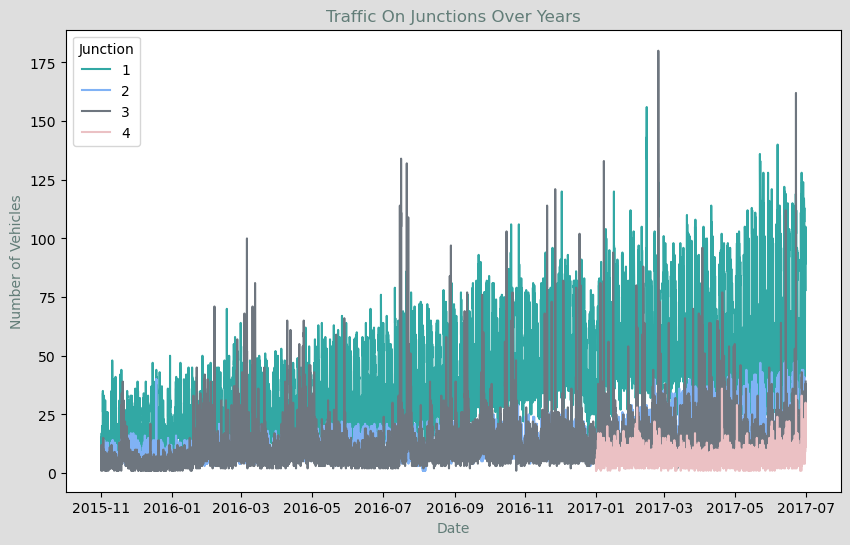

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data.copy() 
colors = ["#32a8a4", "#80B2F5", "#6e767f", "#EBC1C4"]
plt.figure(figsize=(10, 6), facecolor="#DEDEDE")  # Adjusted size
Time_series = sns.lineplot(x=df['DateTime'], y="Vehicles", data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years", color="#627D78")
Time_series.set_ylabel("Number of Vehicles", color="#627D78")
Time_series.set_xlabel("Date", color="#627D78")

plt.show()


This plot is suggesting possible seasonal or weekly cycles in traffic flow that could be critical for forecasting and urban planning. The presence of sharp peaks indicates occasional anomalies, which may correspond to special events or incidents affecting traffic, and would need to be accounted for in predictive models. The overlapping trends between junctions highlight the need for a multi-variate time series analysis to understand the interdependencies and collective dynamics of traffic across the network.






For further analysis of our dataset we decided to add new columns to the DataFrame df by extracting the year, month, day number, hour, and day of the week from a DateTime column.

In [6]:
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


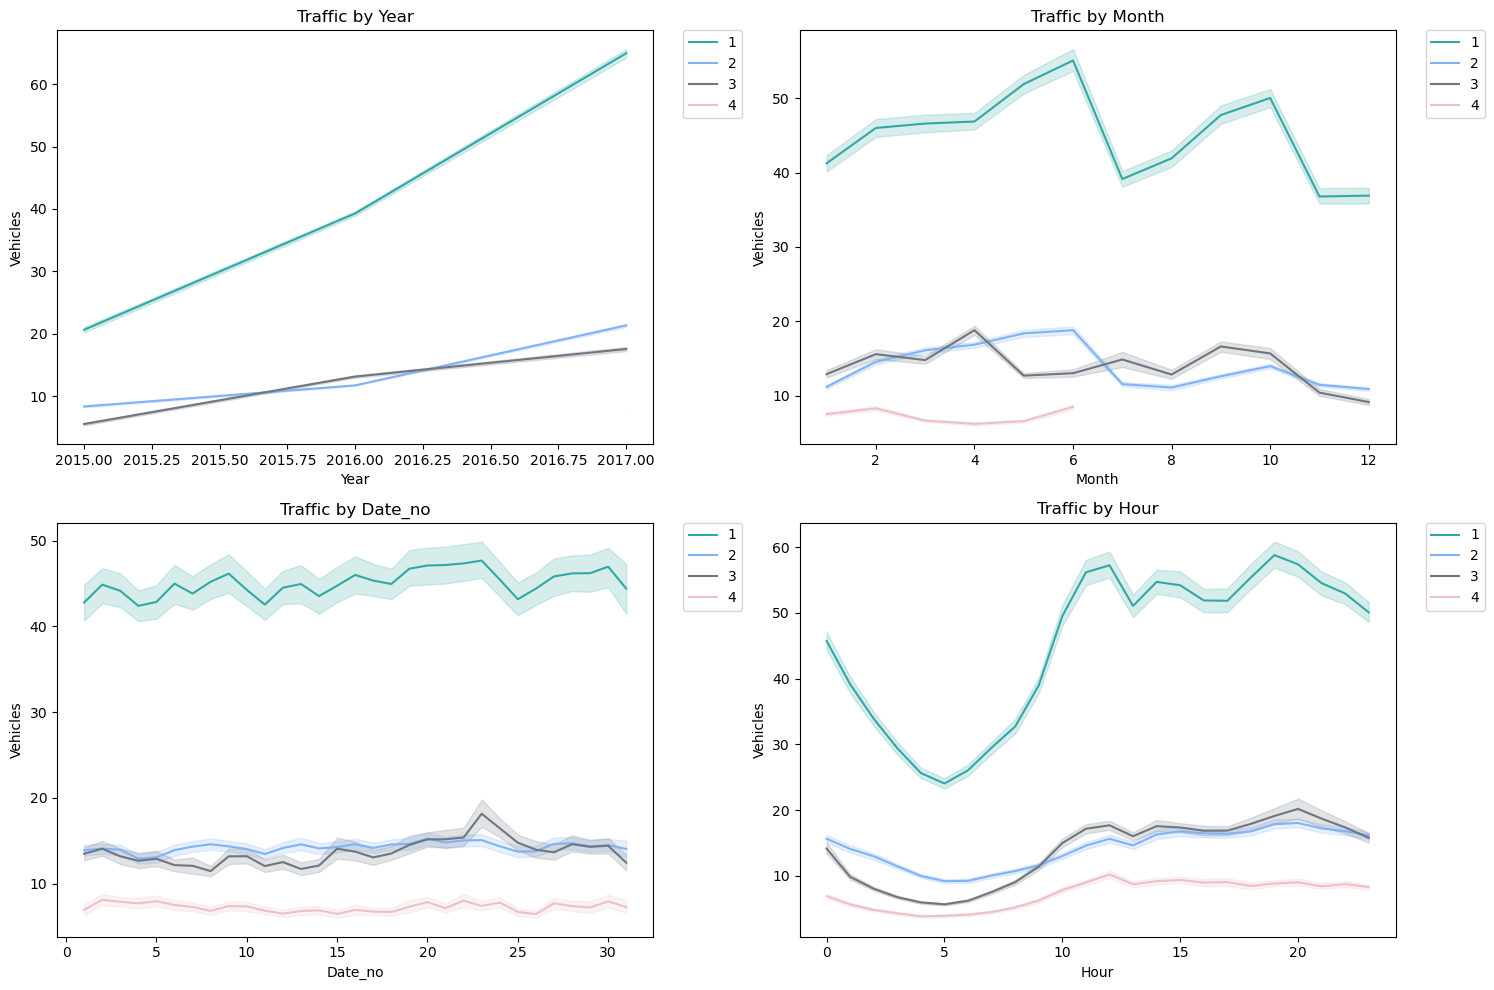

In [7]:
new_features = ["Year", "Month", "Date_no", "Hour"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

for i, feature in enumerate(new_features):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.lineplot(ax=ax, x=df[feature], y="Vehicles", data=df, hue="Junction", palette=colors)
    ax.set_title(f'Traffic by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel("Vehicles")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout() 
plt.show()


- The "Traffic by Month" plot suggests some seasonality in traffic volumes, with peaks and troughs appearing at certain intervals throughout the year, which may indicate a seasonal pattern. 

- The "Traffic by Year" plot indicates a yearly trend, especially for one junction where traffic volumes are consistently rising over the years.

- The "Traffic by Hour" plot shows a clear daily pattern, with traffic volumes dipping during late-night hours and peaking during what may be morning or evening rush hours. 

These patterns suggest both daily and annual cycles in traffic volume, which are key considerations in time series analysis for traffic data.

Text(0.5, 0, 'Year')

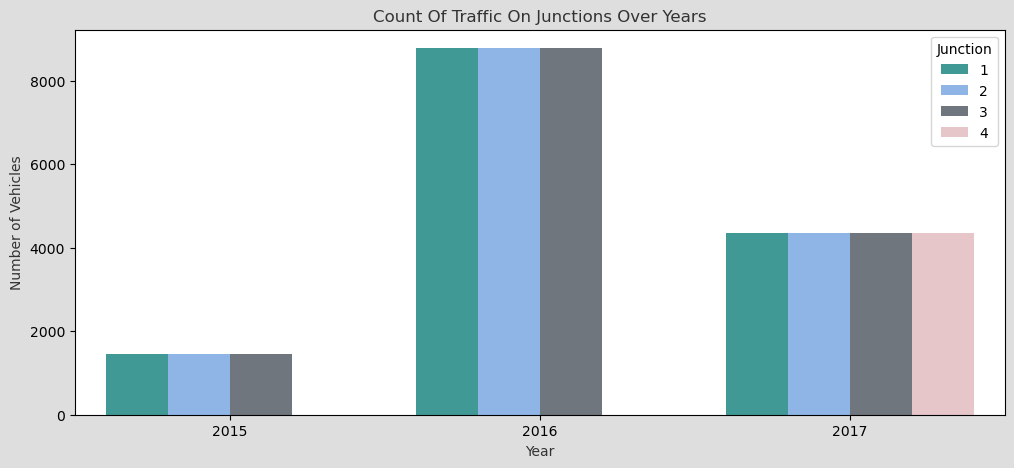

In [8]:
plt.figure(figsize=(12, 5), facecolor="#DEDEDE")
count = sns.countplot(data=df, x="Year", hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years", color="#333333")  # Dark grey color for text
count.set_ylabel("Number of Vehicles", color="#333333")
count.set_xlabel("Year", color="#333333")


The chart is a count plot displaying the number of vehicles recorded at four different junctions over the years 2015, 2016, and 2017. It shows a significant increase in traffic at one of the junctions in 2016 compared to 2015, and then a decrease in 2017, 

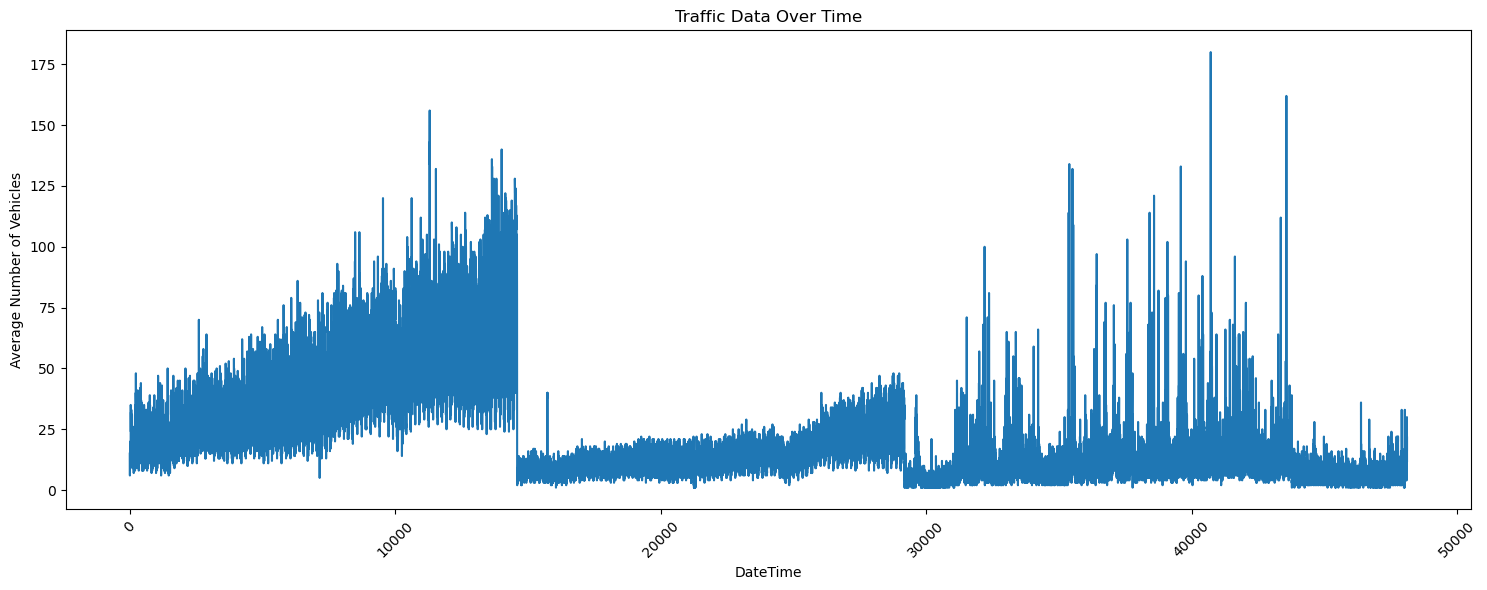

In [9]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x=data.index, y='Vehicles')

plt.title('Traffic Data Over Time')
plt.xlabel('DateTime')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### From the plot we can see that:

**Trend**: A trend exists if there is a long-term increase or decrease in the data. This would be seen as a consistent upward or downward slope in the time series plot.

**Stationarity**: A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time. In a plot, this would typically look like a series that fluctuates around a constant mean without a clear long-term upward or downward trend.

We need further analysis to understand the dataset That's why we will use ADF and KPSS test.

In [10]:

traffic_data_grouped = data.groupby('DateTime').agg({'Vehicles': 'sum'}).reset_index()
traffic_data_grouped.set_index('DateTime', inplace=True)


adf_result = adfuller(traffic_data_grouped['Vehicles'])
kpss_result = kpss(traffic_data_grouped['Vehicles'], nlags="auto")

adf_result, kpss_result


((-6.117712904090635,
  9.010309602229806e-08,
  42,
  14549,
  {'1%': -3.4307995466445482,
   '5%': -2.8617386797172126,
   '10%': -2.566875752496508},
  104890.43346608417),
 (18.451271294880613,
  0.01,
  66,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))


**Augmented Dickey-Fuller Test Results:**
- Test Statistic: -6.1177
- p-value: < 0.01
- Number of Lags Used: 42
- Number of Observations: 14,549
- Critical Values:
    - 1%: -3.4308
    - 5%: -2.8617
    - 10%: -2.5669

**Kwiatkowski-Phillips-Schmidt-Shin Test Results:**
- Test Statistic: 18.4513
- p-value: 0.01
- Number of Lags Used: 66
- Critical Values:
    - 10%: 0.347
    - 5%: 0.463
    - 2.5%: 0.574
    - 1%: 0.739

The results from the ADF test suggest that the series has no unit root and is stationary, while the KPSS test results indicate the series is not stationary. This discrepancy suggests that the time series may be difference-stationary or that other factors, such as structural breaks, could be affecting the stationarity of the series.

### Data transformation

To understande data better we will examine the traffic data across different junctions at each timestamp and understand the statistical properties of the traffic volume or counts at each junction separately.






In [11]:
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

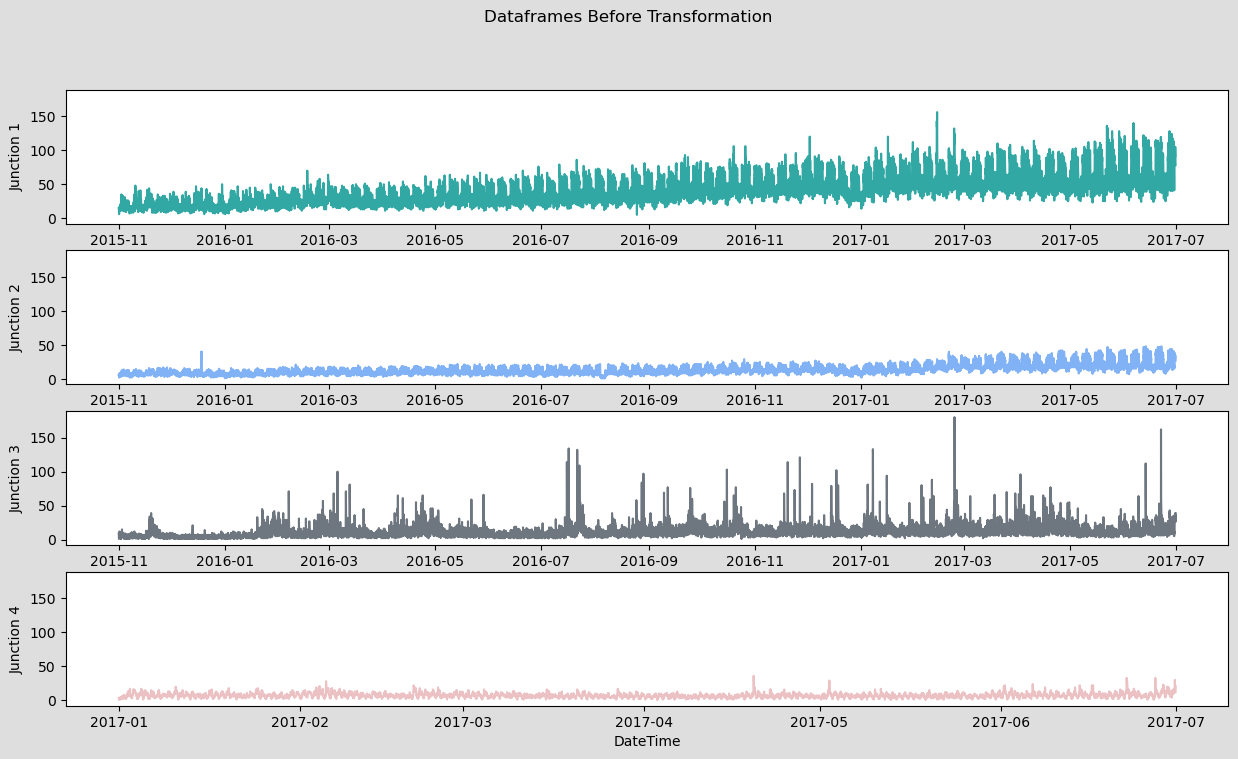

In [12]:
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna()
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)   
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#DEDEDE", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

Based on the plots for the dataset before transformation:

- **Junction 1**: The plot shows a relatively consistent level of traffic over time with some variability. There doesn't appear to be a clear trend (i.e., consistent increase or decrease) in the data, suggesting stationarity in the mean. However, the variability (spread of the data around the mean) seems to increase slightly in the latter part of the series, which could suggest a change in variance over time.

- **Junction 2**: Traffic levels are very low and consistent, with almost no variation. This suggests stationarity, as there's no discernible trend or change in variance.

- **Junction 3**: Initially, the traffic levels are low and there's a lot of zero counts, but over time there's a clear increase in both the frequency and magnitude of traffic counts. This suggests a non-stationary process with a possible trend developing over time.

- **Junction 4**: The plot shows very little activity until a certain point in time, after which there's a sudden increase in traffic counts. This suggests non-stationarity, as there's a clear change in the mean level of the series partway through the timeframe.


### Decomposition

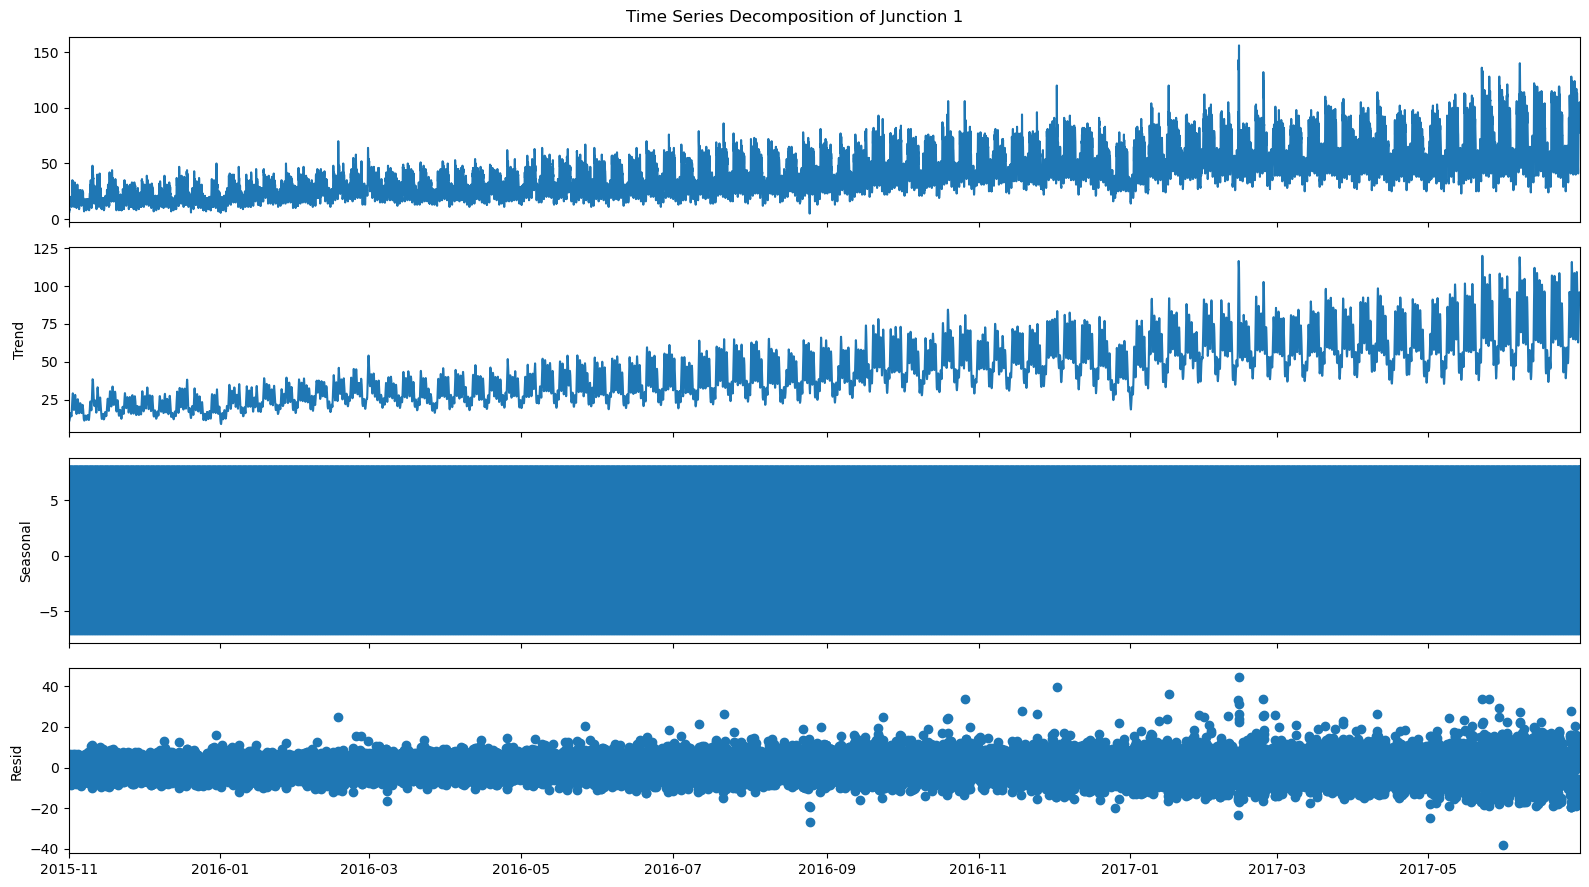

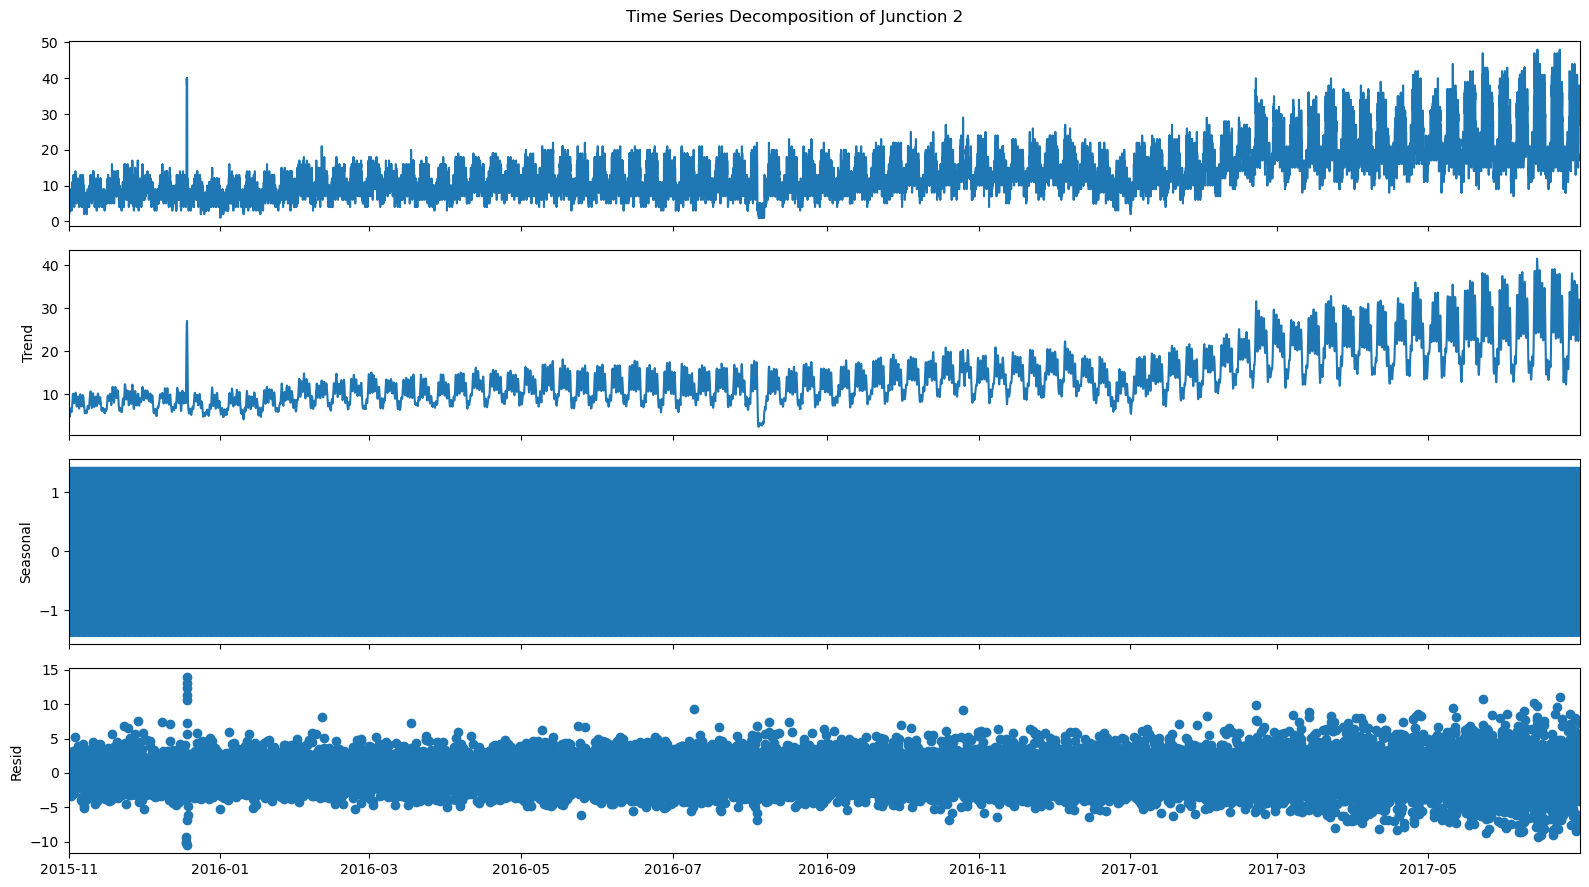

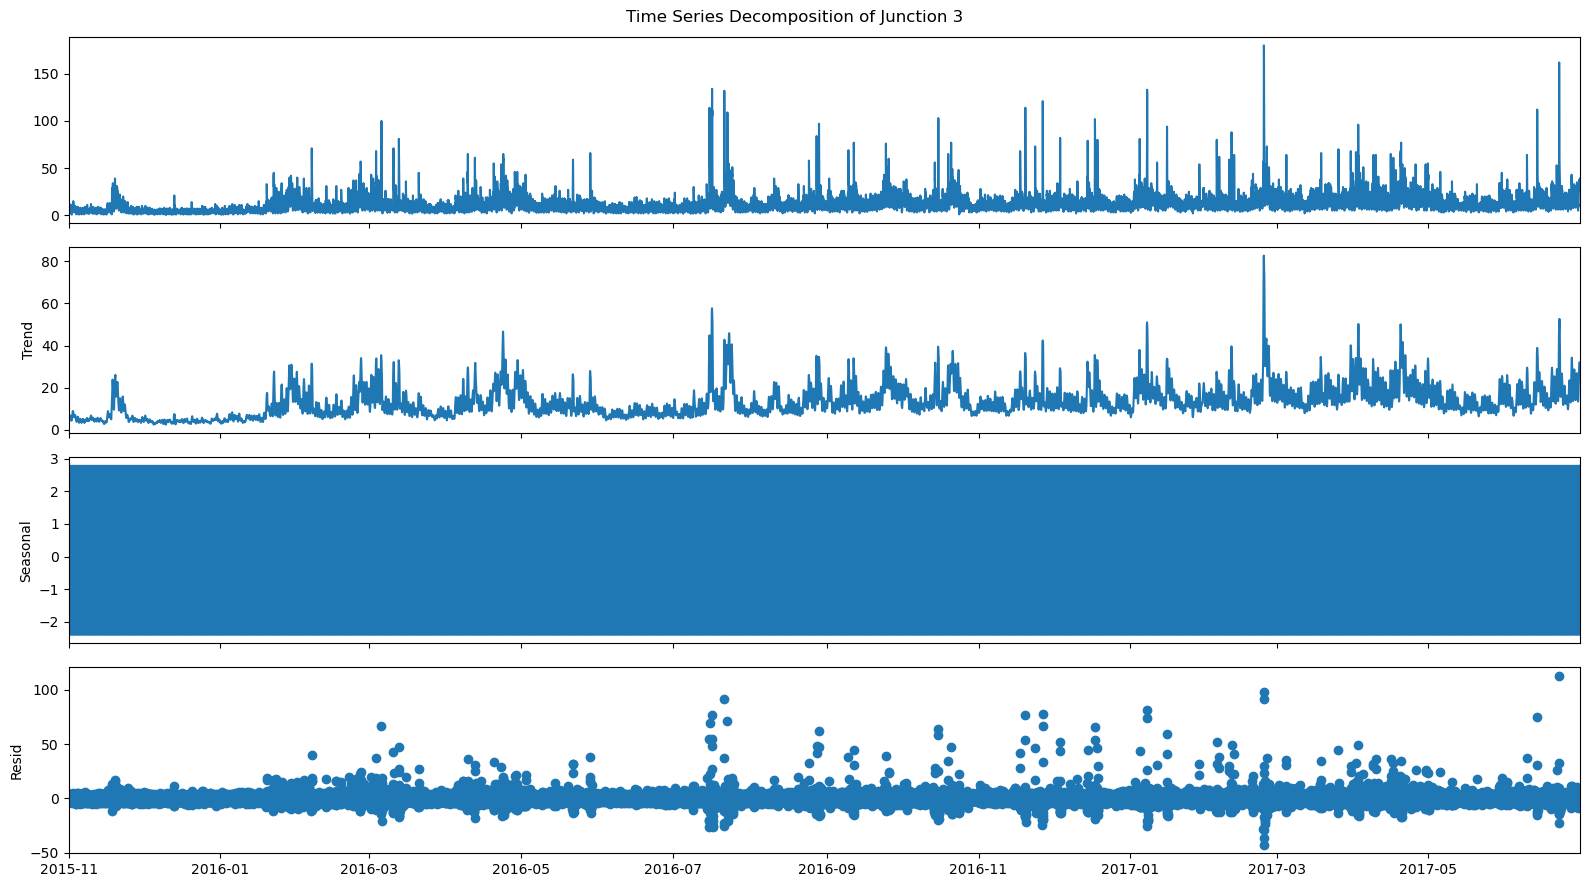

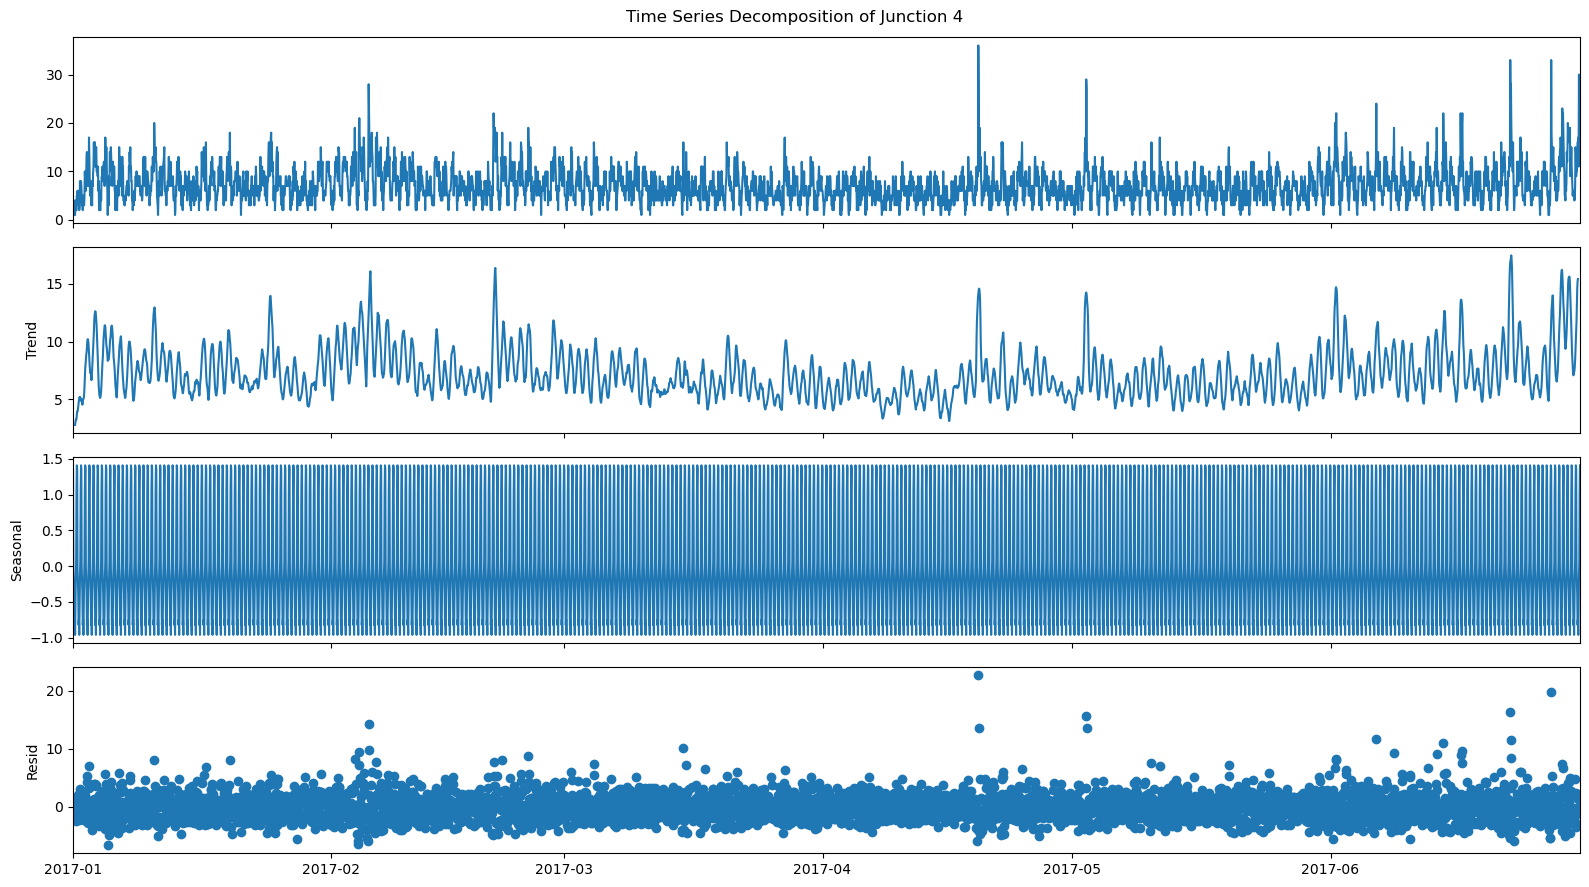

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_list = [df_1, df_2, df_3, df_4]

# Decomposition and plotting
for i, df in enumerate(df_list, start=1):
    # Decompose the current dataframe
    decomposition = sm.tsa.seasonal_decompose(df, period=12)
    
    # Plot the decomposition
    fig = decomposition.plot()
    fig.set_size_inches((16, 9))
    fig.suptitle(f'Time Series Decomposition of Junction {i}')
    fig.tight_layout()
    plt.tight_layout()

    plt.show()


From the plots above we understood that we need to Normalaize and Difference out dataste

In [14]:
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [15]:
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) 
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1
df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24))
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2
df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) 
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3
df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1)
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

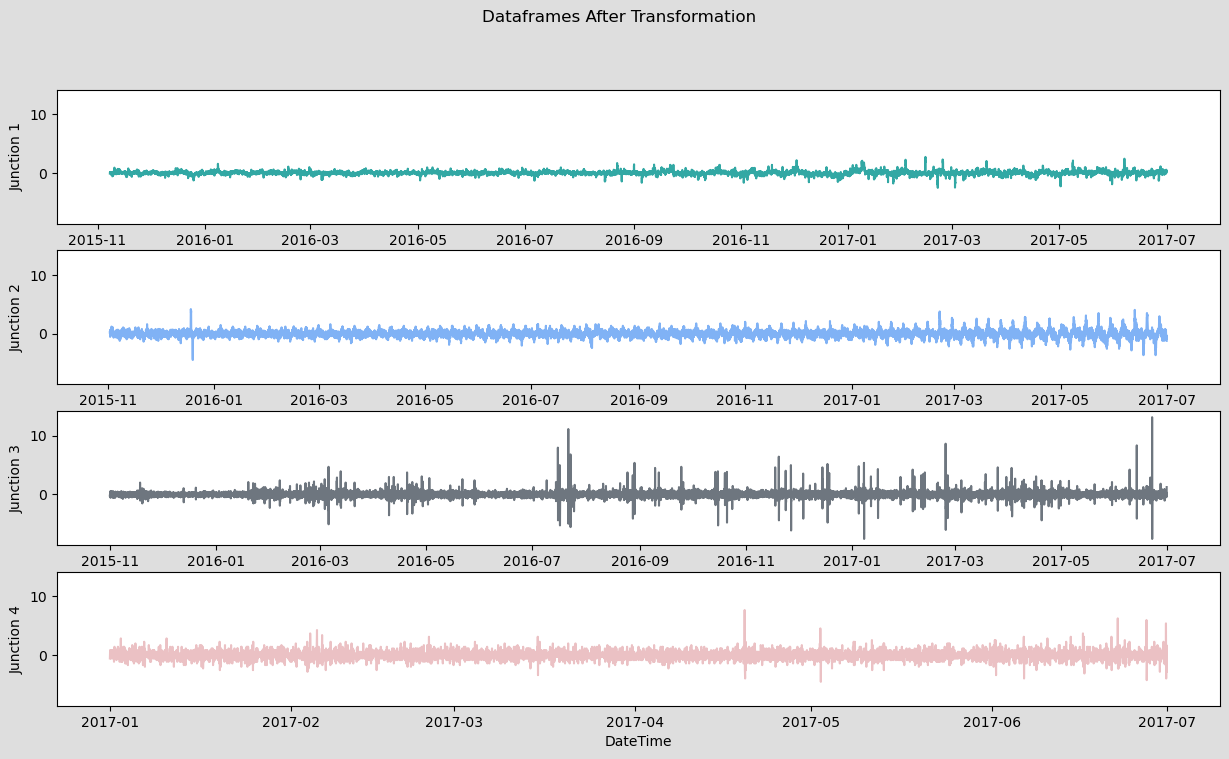

In [16]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

Based on the visual characteristics of the time series in the dataset:

- The first time series (cyan) appears to be stationary as it shows consistent mean and variance over time without any visible trend or seasonality.
- The second time series (blue) also seems to be stationary, though with more variance than the first, it still maintains a consistent mean.
- The third time series (grey) does not appear to be stationary due to the evident fluctuations and changes in variance over time.
- The fourth time series (red) is difficult to judge for stationarity due to its short span; however, it does show a lot of variation, which might suggest non-stationarity.



To be sure about Stationarity we will du ADF Test on the datasets.

In [17]:
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary") 
List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]] 
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415486
p-value: 4.7985398763959575e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.795891026940083
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832376
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305227
p-value: 2.7787875325955e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


**First Series**: The ADF statistic of -15.265 is much lower than any of the critical values, and the p-value is extremely small (close to 0), which strongly rejects the null hypothesis of a unit root (i.e., non-stationarity).

**Second Series**: The ADF statistic is -21.795, again well below the critical values, and the p-value is exactly 0, providing even stronger evidence against the null hypothesis, confirming stationarity.

**Third Series**: With an ADF statistic of -28.002, this series is also far below the threshold for stationarity, and the p-value of 0.0 indicates a high level of confidence in the result.

**Fourth Series**: An ADF statistic of -17.979, well below the critical value threshold, and a very small p-value, suggests that this time series is also stationary.

After we claimed stationarity of our time series wecan do tests on our dataset



# Train Test Split

In [18]:
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()
df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()
df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()
df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)
X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)
X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)
X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

We will plot ACF and PACF of our dataset to understand model and order of the model to be used

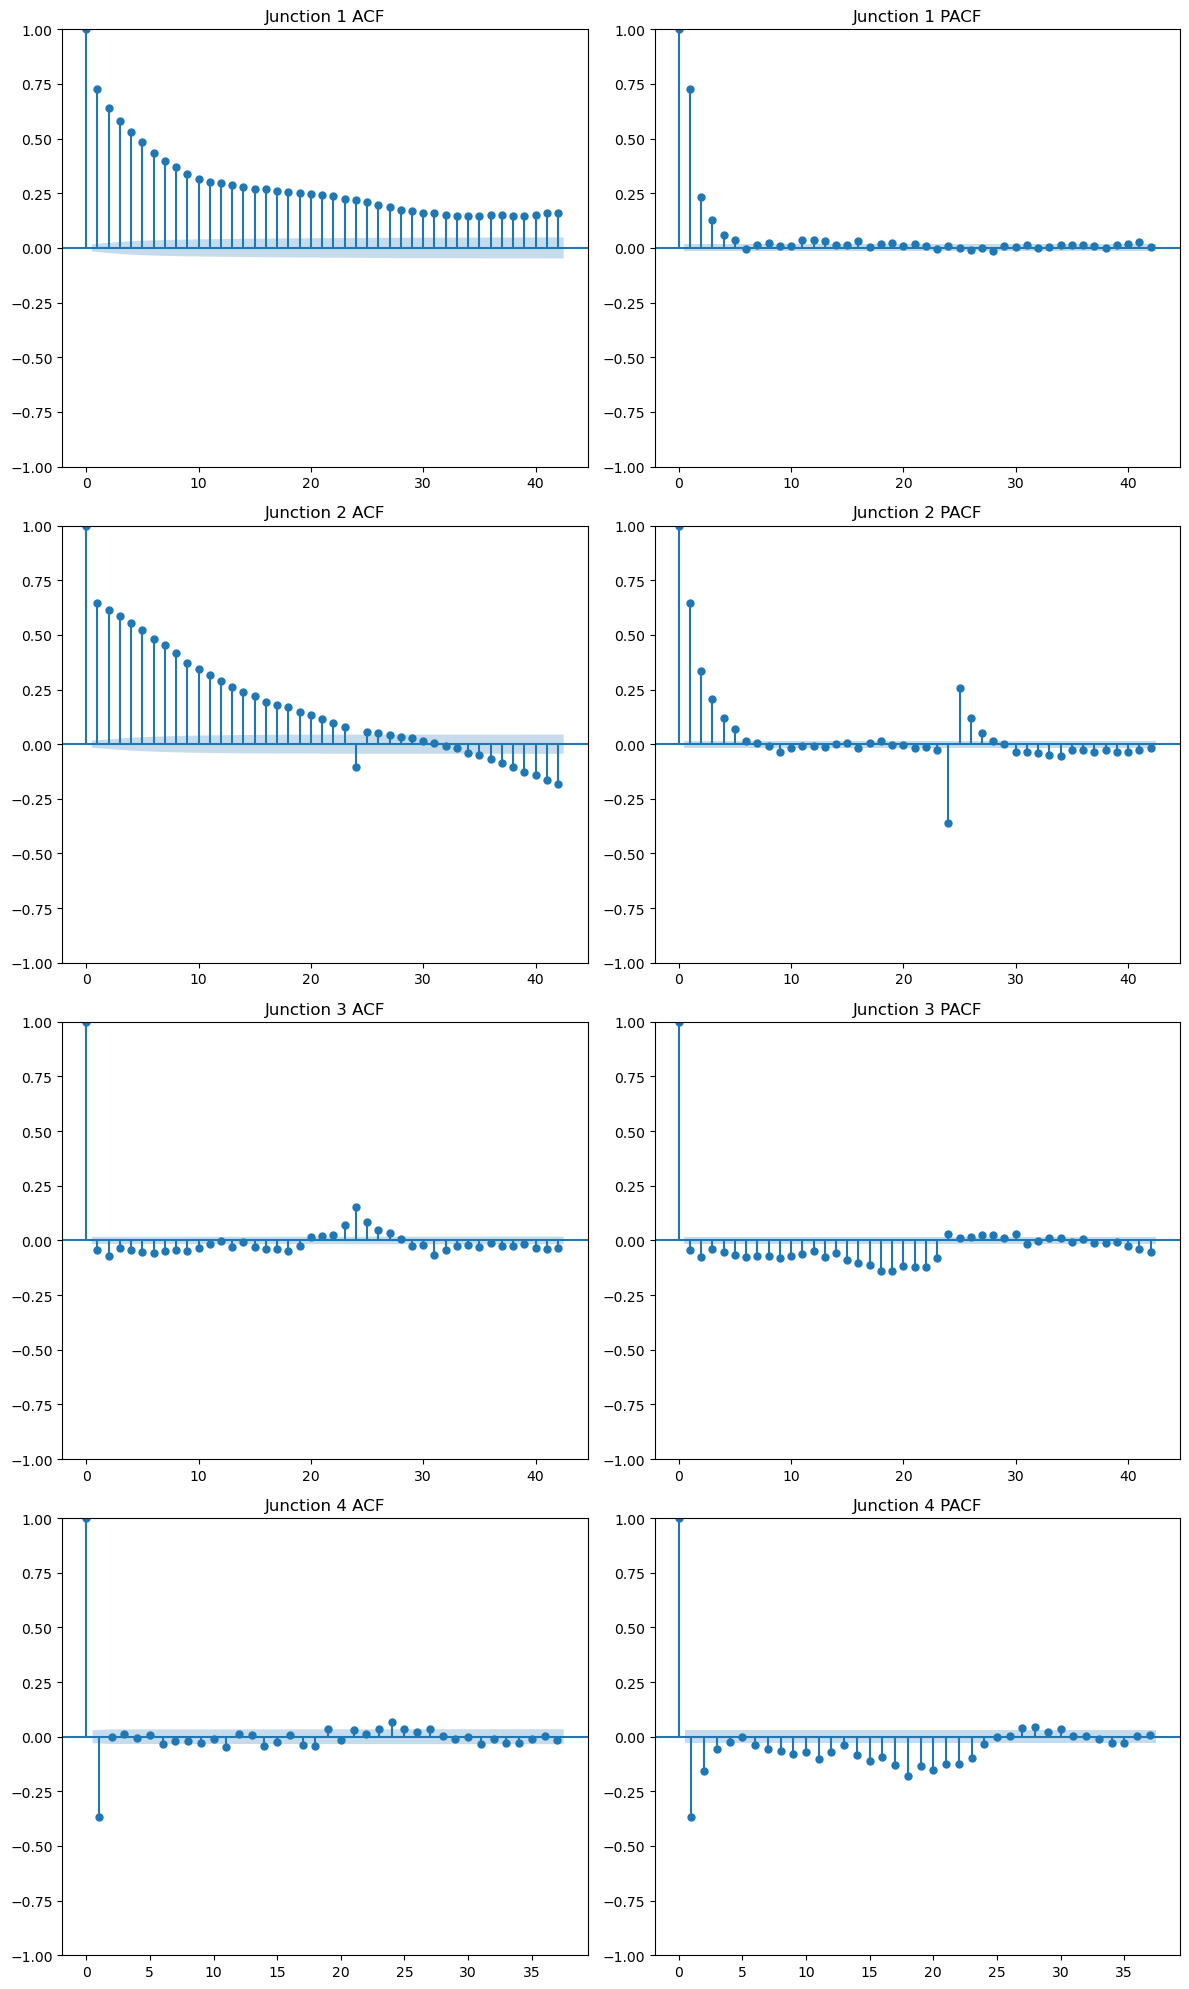

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# List of dataframes for each junction
junctions = [df_J1, df_J2, df_J3, df_J4]

# Create a figure with subplots for each junction's ACF and PACF
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20)) # Adjust the size as needed

# Loop over each junction and plot ACF and PACF
for i, df in enumerate(junctions, 1):
    plot_acf(df, ax=axes[i-1, 0], title=f'Junction {i} ACF')
    plot_pacf(df, ax=axes[i-1, 1], title=f'Junction {i} PACF')

# Display the plots
plt.tight_layout()
plt.show()


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

    lr_schedule = ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9
    )

    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9), loss='mean_squared_error')
    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])
    pred_GRU = model.predict(X_Test)
    return pred_GRU
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#DEDEDE")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#442054",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [25]:
PredJ1 = GRU_model(X_trainJ1,y_trainJ1,X_testJ1)
RMSE_J1=RMSE_Value(y_testJ1,PredJ1)

Epoch 1/50
87/87 [==============================] - 58s 474ms/step - loss: 0.0761
Epoch 2/50
87/87 [==============================] - 44s 500ms/step - loss: 0.0657
Epoch 3/50
87/87 [==============================] - 45s 516ms/step - loss: 0.0640
Epoch 4/50
87/87 [==============================] - 44s 506ms/step - loss: 0.0624
Epoch 5/50
87/87 [==============================] - 44s 505ms/step - loss: 0.0611
Epoch 6/50
87/87 [==============================] - 48s 546ms/step - loss: 0.0601
Epoch 7/50
87/87 [==============================] - 37s 430ms/step - loss: 0.0588
Epoch 8/50
87/87 [==============================] - 33s 381ms/step - loss: 0.0585
Epoch 9/50
87/87 [==============================] - 34s 388ms/step - loss: 0.0573
Epoch 10/50
87/87 [==============================] - 29s 331ms/step - loss: 0.0568
Epoch 11/50
87/87 [==============================] - 202s 2s/step - loss: 0.0559
Epoch 12/50
87/87 [==============================] - 1679s 20s/step - loss: 0.0552
Epoch 13/50
87/

Epoch 32/50
87/87 [==============================] - 50s 571ms/step - loss: 0.0495
Epoch 33/50
87/87 [==============================] - 39s 443ms/step - loss: 0.0496
Epoch 34/50
87/87 [==============================] - 36s 415ms/step - loss: 0.0496
Epoch 35/50
87/87 [==============================] - 40s 456ms/step - loss: 0.0495
Epoch 36/50
87/87 [==============================] - 39s 447ms/step - loss: 0.0492
Epoch 37/50
87/87 [==============================] - 46s 530ms/step - loss: 0.0495
Epoch 38/50
87/87 [==============================] - 39s 445ms/step - loss: 0.0486
Epoch 39/50
87/87 [==============================] - 45s 511ms/step - loss: 0.0491
Epoch 40/50
87/87 [==============================] - 31s 362ms/step - loss: 0.0492
Epoch 41/50
87/87 [==============================] - 42s 483ms/step - loss: 0.0486
Epoch 42/50
87/87 [==============================] - 49s 564ms/step - loss: 0.0489
Epoch 43/50
87/87 [==============================] - 36s 417ms/step - loss: 0.0491
Epoc

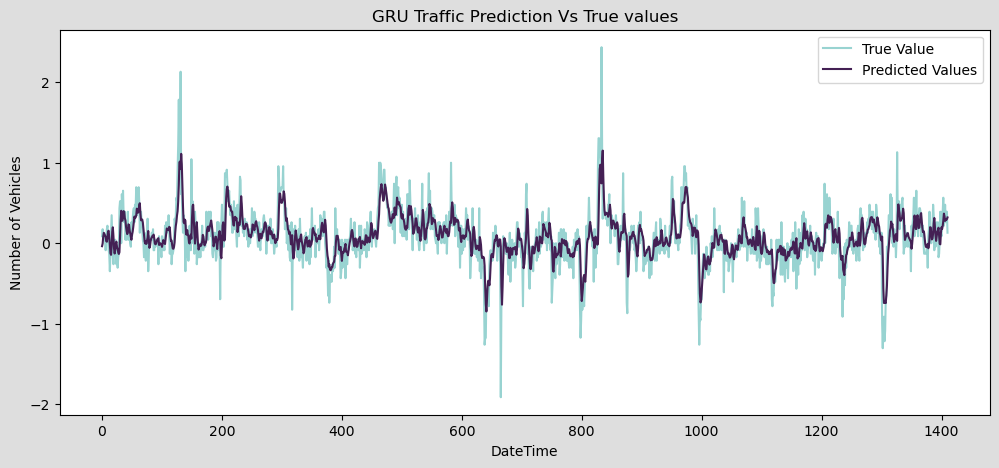

In [26]:
PredictionsPlot(y_testJ1,PredJ1,0)

In [31]:
PredJ2 = GRU_model(X_trainJ2,y_trainJ2,X_testJ2)

Epoch 1/50
88/88 [==============================] - 44s 350ms/step - loss: 0.2322
Epoch 2/50
88/88 [==============================] - 35s 398ms/step - loss: 0.2041
Epoch 3/50
88/88 [==============================] - 38s 435ms/step - loss: 0.1975
Epoch 4/50
88/88 [==============================] - 34s 384ms/step - loss: 0.1985
Epoch 5/50
88/88 [==============================] - 34s 385ms/step - loss: 0.1939
Epoch 6/50
88/88 [==============================] - 36s 408ms/step - loss: 0.1930
Epoch 7/50
88/88 [==============================] - 37s 416ms/step - loss: 0.1926
Epoch 8/50
88/88 [==============================] - 36s 409ms/step - loss: 0.1902
Epoch 9/50
88/88 [==============================] - 37s 423ms/step - loss: 0.1893
Epoch 10/50
88/88 [==============================] - 36s 407ms/step - loss: 0.1894
Epoch 11/50
88/88 [==============================] - 34s 386ms/step - loss: 0.1889
Epoch 12/50
88/88 [==============================] - 36s 411ms/step - loss: 0.1883
Epoch 13/50
8

Epoch 32/50
88/88 [==============================] - 36s 404ms/step - loss: 0.1822
Epoch 33/50
88/88 [==============================] - 31s 350ms/step - loss: 0.1825
Epoch 34/50
88/88 [==============================] - 32s 362ms/step - loss: 0.1839
Epoch 35/50
88/88 [==============================] - 33s 377ms/step - loss: 0.1840
Epoch 36/50
88/88 [==============================] - 36s 413ms/step - loss: 0.1823
Epoch 37/50
88/88 [==============================] - 32s 363ms/step - loss: 0.1832
Epoch 38/50
88/88 [==============================] - 31s 349ms/step - loss: 0.1824
Epoch 39/50
88/88 [==============================] - 33s 380ms/step - loss: 0.1837
Epoch 40/50
88/88 [==============================] - 38s 434ms/step - loss: 0.1820
Epoch 41/50
88/88 [==============================] - 34s 385ms/step - loss: 0.1813
Epoch 42/50
88/88 [==============================] - 36s 410ms/step - loss: 0.1822
Epoch 43/50
88/88 [==============================] - 38s 427ms/step - loss: 0.1813
Epoc

The root mean squared error is 0.5578913542189996.


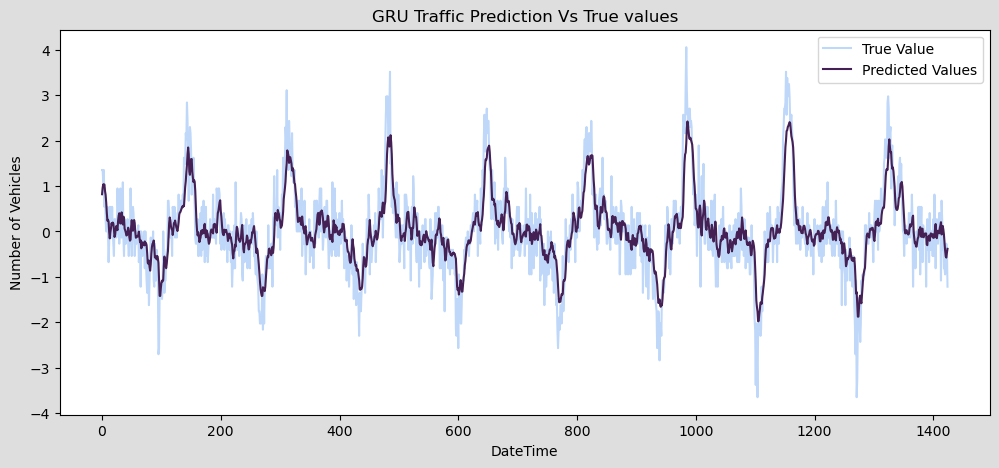

In [32]:
RMSE_J2=RMSE_Value(y_testJ2,PredJ2)
PredictionsPlot(y_testJ2,PredJ2,1)

In [33]:
PredJ3 = GRU_model(X_trainJ3,y_trainJ3,X_testJ3) 

Epoch 1/50
88/88 [==============================] - 43s 340ms/step - loss: 0.3028
Epoch 2/50
88/88 [==============================] - 30s 338ms/step - loss: 0.2963
Epoch 3/50
88/88 [==============================] - 28s 321ms/step - loss: 0.2915
Epoch 4/50
88/88 [==============================] - 33s 374ms/step - loss: 0.2889
Epoch 5/50
88/88 [==============================] - 36s 409ms/step - loss: 0.2900
Epoch 6/50
88/88 [==============================] - 32s 365ms/step - loss: 0.2885
Epoch 7/50
88/88 [==============================] - 31s 354ms/step - loss: 0.2867
Epoch 8/50
88/88 [==============================] - 25s 281ms/step - loss: 0.2905
Epoch 9/50
88/88 [==============================] - 26s 291ms/step - loss: 0.2893
Epoch 10/50
88/88 [==============================] - 25s 282ms/step - loss: 0.2870
Epoch 11/50
88/88 [==============================] - 25s 281ms/step - loss: 0.2867
Epoch 12/50
88/88 [==============================] - 25s 288ms/step - loss: 0.2896
Epoch 13/50
8

Epoch 32/50
88/88 [==============================] - 30s 344ms/step - loss: 0.2735
Epoch 33/50
88/88 [==============================] - 29s 332ms/step - loss: 0.2707
Epoch 34/50
88/88 [==============================] - 29s 332ms/step - loss: 0.2766
Epoch 35/50
88/88 [==============================] - 30s 341ms/step - loss: 0.2711
Epoch 36/50
88/88 [==============================] - 32s 358ms/step - loss: 0.2714
Epoch 37/50
88/88 [==============================] - 30s 341ms/step - loss: 0.2721
Epoch 38/50
88/88 [==============================] - 30s 337ms/step - loss: 0.2709
Epoch 39/50
88/88 [==============================] - 28s 322ms/step - loss: 0.2700
Epoch 40/50
88/88 [==============================] - 29s 326ms/step - loss: 0.2688
Epoch 41/50
88/88 [==============================] - 33s 380ms/step - loss: 0.2691
Epoch 42/50
88/88 [==============================] - 52s 586ms/step - loss: 0.2703
Epoch 43/50
88/88 [==============================] - 29s 333ms/step - loss: 0.2700
Epoc

The root mean squared error is 0.6061505643654944.


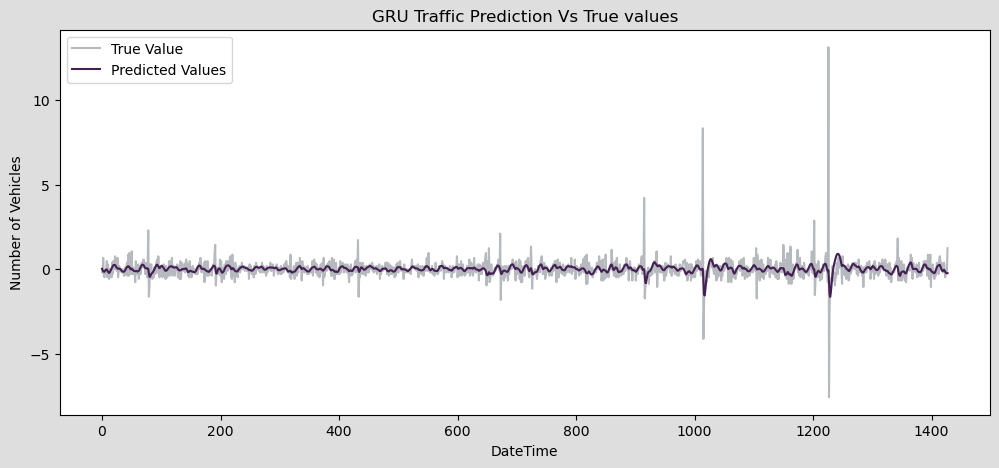

In [34]:
RMSE_J3=RMSE_Value(y_testJ3,PredJ3)
PredictionsPlot(y_testJ3,PredJ3,2)

In [35]:
PredJ4 = GRU_model(X_trainJ4,y_trainJ4,X_testJ4)

Epoch 1/50
26/26 [==============================] - 34s 465ms/step - loss: 0.6936
Epoch 2/50
26/26 [==============================] - 12s 475ms/step - loss: 0.6889
Epoch 3/50
26/26 [==============================] - 12s 455ms/step - loss: 0.6932
Epoch 4/50
26/26 [==============================] - 12s 456ms/step - loss: 0.6878
Epoch 5/50
26/26 [==============================] - 13s 502ms/step - loss: 0.6860
Epoch 6/50
26/26 [==============================] - 11s 412ms/step - loss: 0.6888
Epoch 7/50
26/26 [==============================] - 11s 412ms/step - loss: 0.6821
Epoch 8/50
26/26 [==============================] - 10s 390ms/step - loss: 0.6776
Epoch 9/50
26/26 [==============================] - 10s 381ms/step - loss: 0.6774
Epoch 10/50
26/26 [==============================] - 11s 439ms/step - loss: 0.6797
Epoch 11/50
26/26 [==============================] - 14s 537ms/step - loss: 0.6792
Epoch 12/50
26/26 [==============================] - 10s 395ms/step - loss: 0.6763
Epoch 13/50
2

Epoch 32/50
26/26 [==============================] - 10s 369ms/step - loss: 0.6544
Epoch 33/50
26/26 [==============================] - 73s 3s/step - loss: 0.6551
Epoch 34/50
26/26 [==============================] - 9s 360ms/step - loss: 0.6517
Epoch 35/50
26/26 [==============================] - 9s 360ms/step - loss: 0.6421
Epoch 36/50
26/26 [==============================] - 10s 372ms/step - loss: 0.6606
Epoch 37/50
26/26 [==============================] - 10s 374ms/step - loss: 0.6617
Epoch 38/50
26/26 [==============================] - 1032s 41s/step - loss: 0.6308
Epoch 39/50
26/26 [==============================] - 10s 370ms/step - loss: 0.6322
Epoch 40/50
26/26 [==============================] - 11s 417ms/step - loss: 0.6169
Epoch 41/50
26/26 [==============================] - 6554s 262s/step - loss: 0.6065
Epoch 42/50
26/26 [==============================] - 11s 427ms/step - loss: 0.5942
Epoch 43/50
26/26 [==============================] - 13s 486ms/step - loss: 0.5927
Epoch 44

The root mean squared error is 1.0101789350859312.


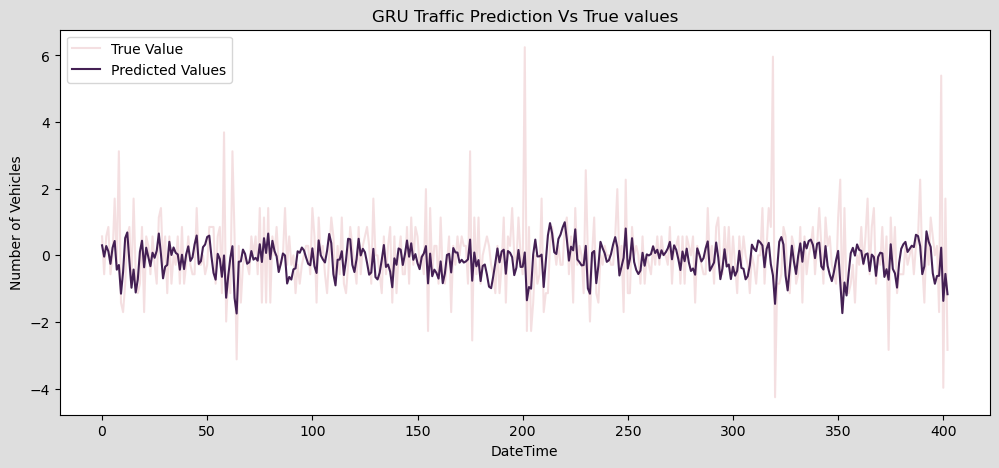

In [36]:
RMSE_J4=RMSE_Value(y_testJ4,PredJ4)
PredictionsPlot(y_testJ4,PredJ4,3)

In [37]:
Junctions = ["Junction1", "Junction2", "Junction3", "Junction4"]
RMSE = [RMSE_J1, RMSE_J2, RMSE_J3, RMSE_J4]
list_of_tuples = list(zip(Junctions, RMSE))
Results = pd.DataFrame(list_of_tuples, columns=["Junction", "RMSE"])
Results.style.background_gradient(cmap="Pastel2")   

,Junction,RMSE
0,Junction1,0.246221
1,Junction2,0.557891
2,Junction3,0.606151
3,Junction4,1.010179


In [1]:
pd.set_option('display.max_rows',10)
def nl():
    print('\n')
df_dataset = pd.read_csv("traffic.csv", parse_dates=[0],infer_datetime_format=True)

NameError: name 'pd' is not defined

In [ ]:
convert_dict = {'Junction': float }
df_dataset = df_dataset.astype(convert_dict)

In [2]:
X=df_dataset.values
y=df_dataset.iloc[38496:48120,0:3].values

NameError: name 'df_dataset' is not defined

In [41]:
print(X.shape,y.shape)

(48120, 4) (9624, 3)


# ARIMA Model

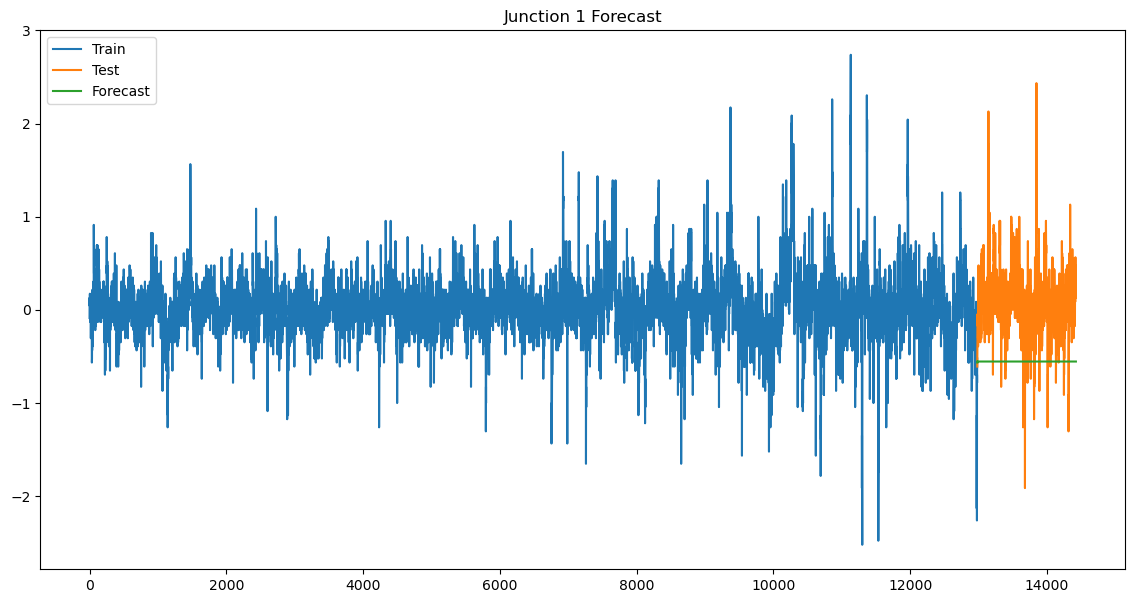

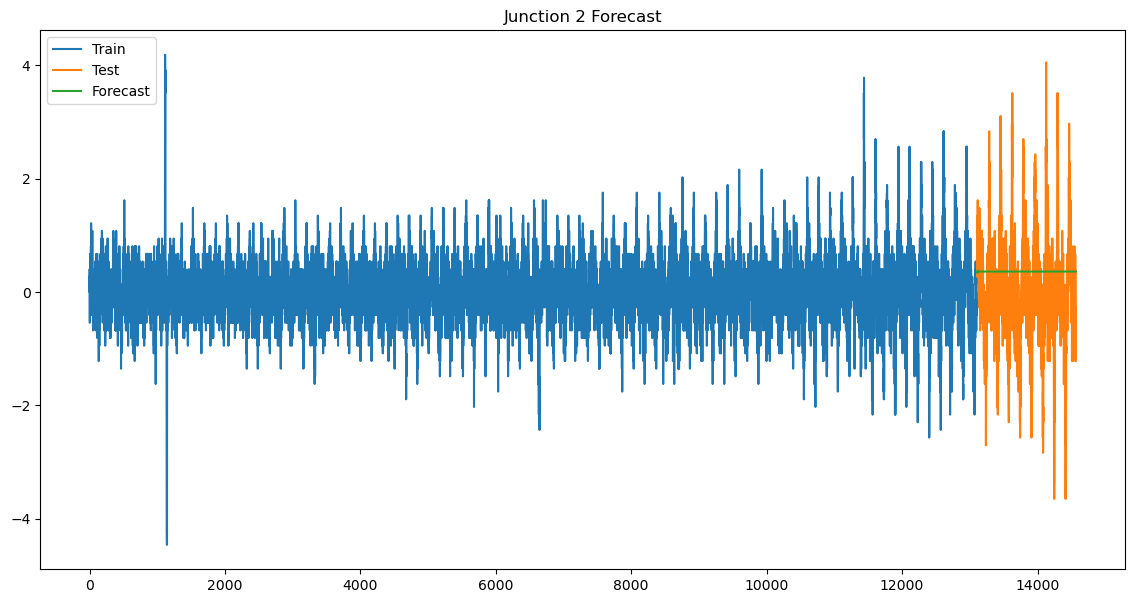

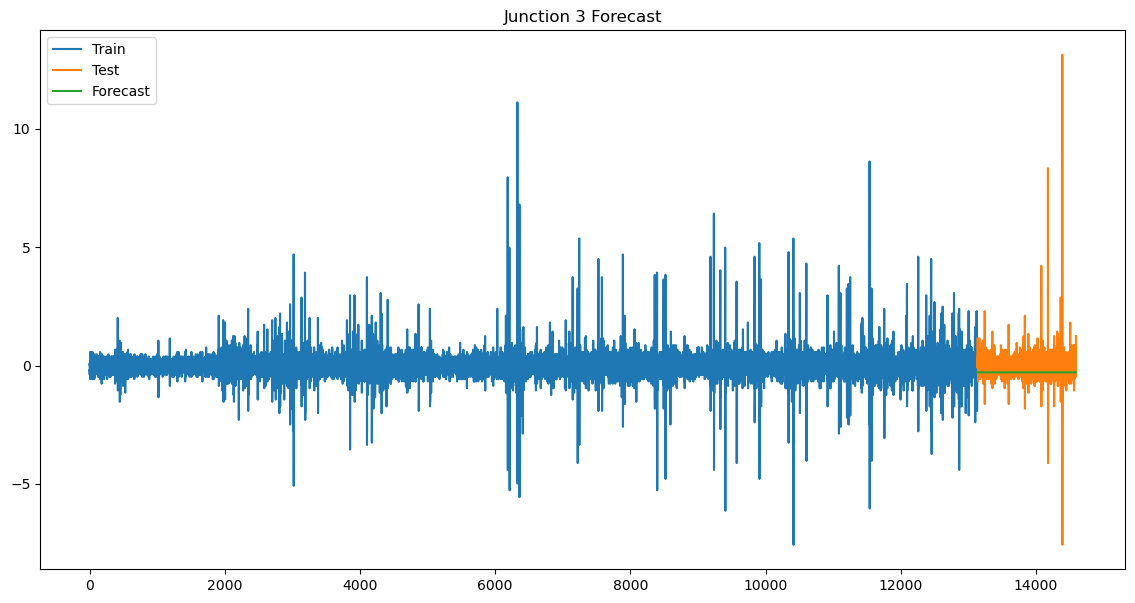

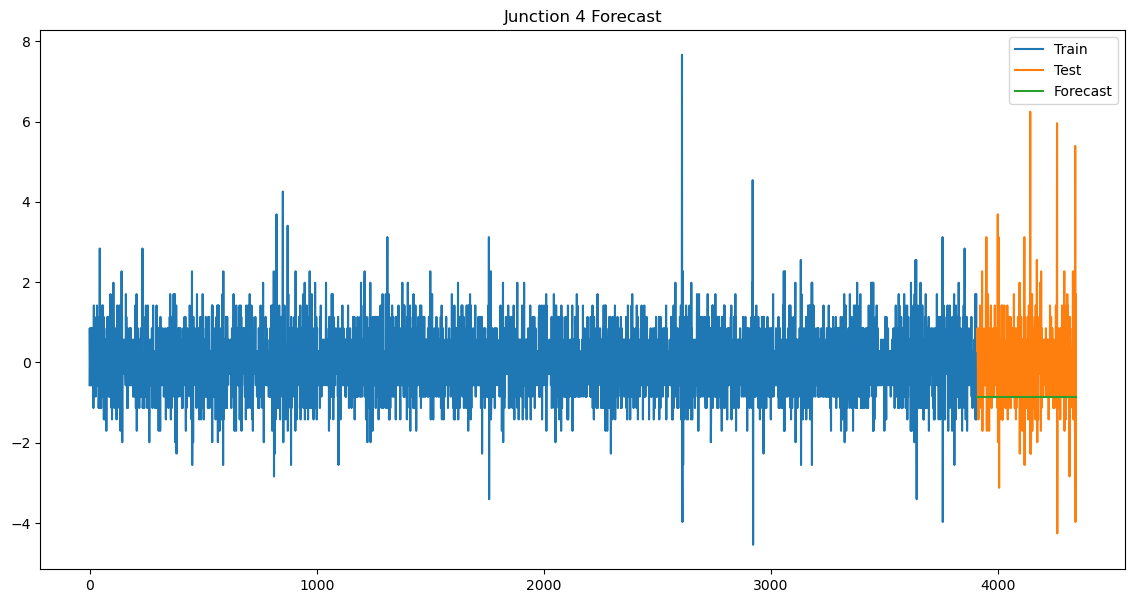

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def apply_arima(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    return model_fit, forecast


order_j1 = (1, 1, 0)
order_j2 = (1, 1, 0)  
order_j3 = (0, 1, 0)
order_j4 = (0, 1, 0)

model_fit_j1, forecast_j1 = apply_arima(J1_train, J1_test, order_j1)
model_fit_j2, forecast_j2 = apply_arima(J2_train, J2_test, order_j2)
model_fit_j3, forecast_j3 = apply_arima(J3_train, J3_test, order_j3)
model_fit_j4, forecast_j4 = apply_arima(J4_train, J4_test, order_j4)

def plot_forecasts(train, test, forecast, title):
    plt.figure(figsize=(14, 7))
    plt.plot(train, label='Train')
    plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Test')
    plt.plot(np.arange(len(train), len(train) + len(forecast)), forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

plot_forecasts(J1_train, J1_test, forecast_j1, 'Junction 1 Forecast')
plot_forecasts(J2_train, J2_test, forecast_j2, 'Junction 2 Forecast')
plot_forecasts(J3_train, J3_test, forecast_j3, 'Junction 3 Forecast')
plot_forecasts(J4_train, J4_test, forecast_j4, 'Junction 4 Forecast')


# Garch Model


Optimization terminated successfully    (Exit mode 0)
            Current function value: 511.182279946888
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


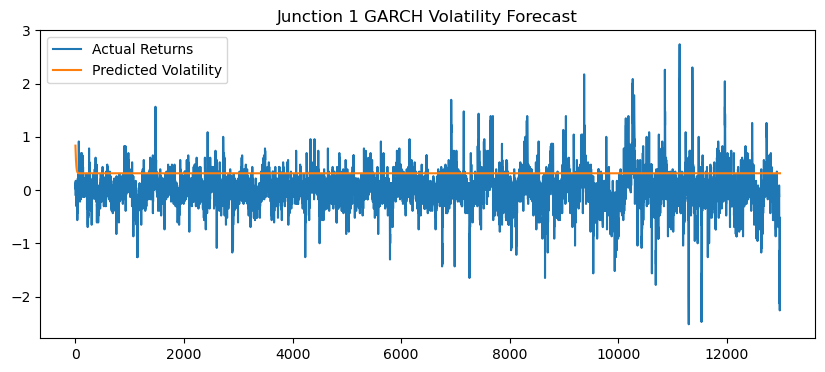

Iteration:     10,   Func. Count:     64,   Neg. LLF: 8996.737499753208
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8996.737496900294
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


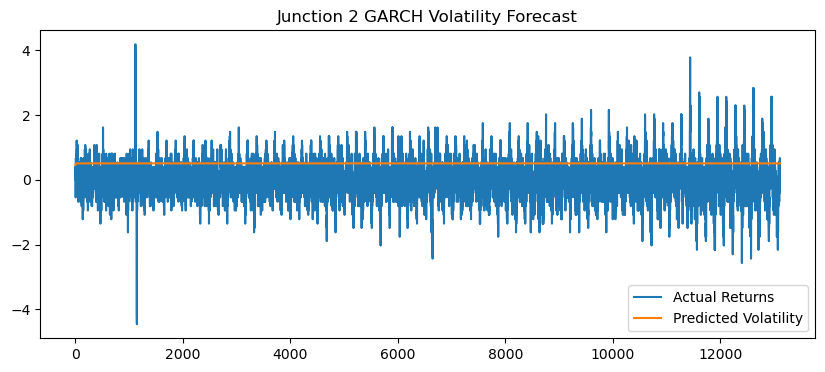

Iteration:     10,   Func. Count:     63,   Neg. LLF: 7874.996487799555
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7874.996487799429
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


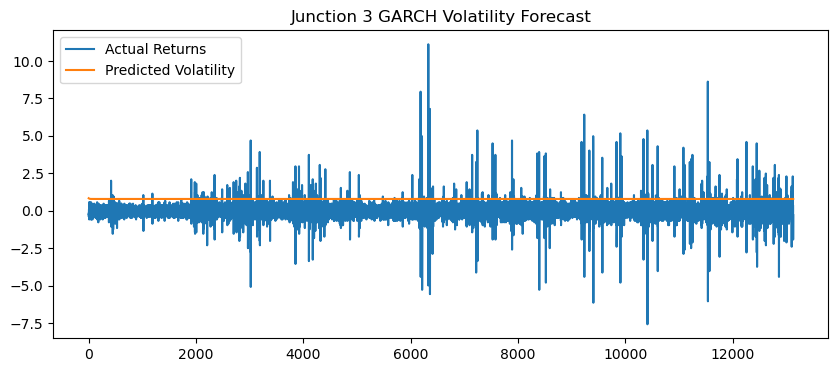

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4731.321747498444
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


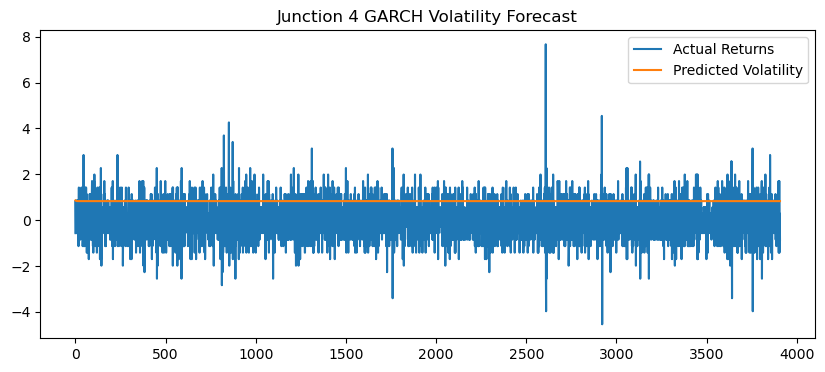

In [29]:
from arch import arch_model
import matplotlib.pyplot as plt

def fit_garch_model(returns):
    # Assuming GARCH(1,1) for simplicity. This may need to be adjusted based on the dataset.
    garch = arch_model(returns, vol='Garch', p=1, q=1)
    model = garch.fit(update_freq=10)
    forecast = model.forecast(horizon=len(returns))
    return model, forecast

for i, junction_data in enumerate([J1_train, J2_train, J3_train, J4_train], 1):
    model, forecast = fit_garch_model(junction_data)
    
    plt.figure(figsize=(10, 4))
    plt.plot(junction_data, label='Actual Returns')
    plt.plot(forecast.variance.values[-1]**0.5, label='Predicted Volatility')
    plt.title(f'Junction {i} GARCH Volatility Forecast')
    plt.legend()
    plt.show()
